In [29]:
import pandas as pd

# importando os arquivos
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';')

# selecionando as colunas desejadas
clientes_df = clientes_df[['ID Cliente','E-mail']]
produtos_df = produtos_df[['ID Produto','Nome do Produto']]
lojas_df = lojas_df[['ID Loja','Nome da Loja']]

# mesclando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')

# renomeando coluna
vendas_df = vendas_df.rename(columns={'E-mail': 'E-mail do Cliente'})

display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


E-mail do Cliente
karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: count, Length: 38907, dtype: int64

<Axes: xlabel='E-mail do Cliente'>

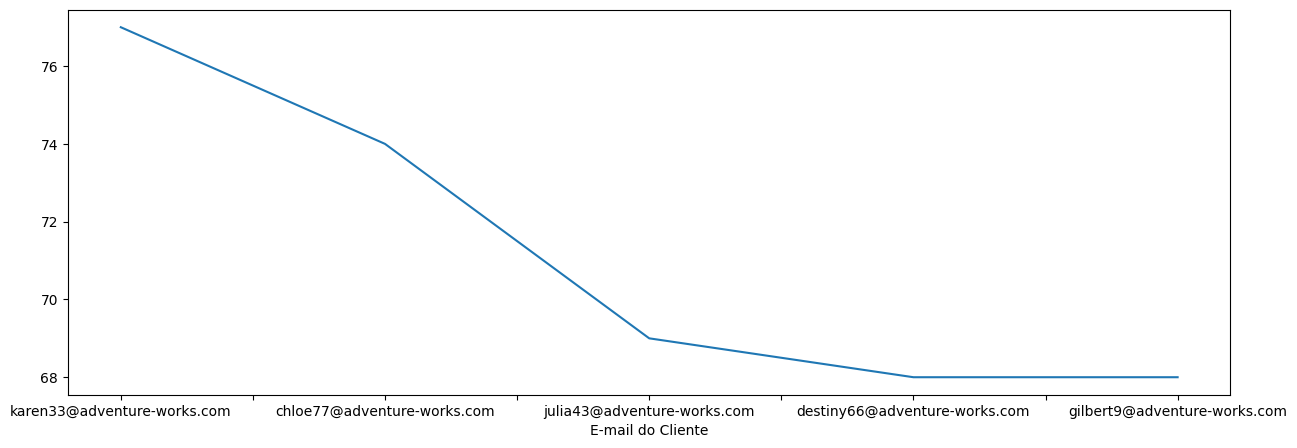

In [30]:
# Qual cliente comprou mais vezes?
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()

display(frequencia_clientes)

frequencia_clientes[:5].plot(figsize=(15,5))

,Quantidade Vendida,Quantidade Devolvida,Quantidade Vendas Totais
Nome da Loja,,,
Loja Contoso Catalog,1029117,9615,1019502
Loja Contoso North America Online,701961,8206,693755
Loja Contoso Europe Online,616845,8174,608671
Loja Contoso Asia Online,578458,6646,571812
Loja Contoso North America Reseller,520176,6165,514011


'A Loja Contoso Catalog  possui a maior quantidade em vendas, total de 1019502 vendas'

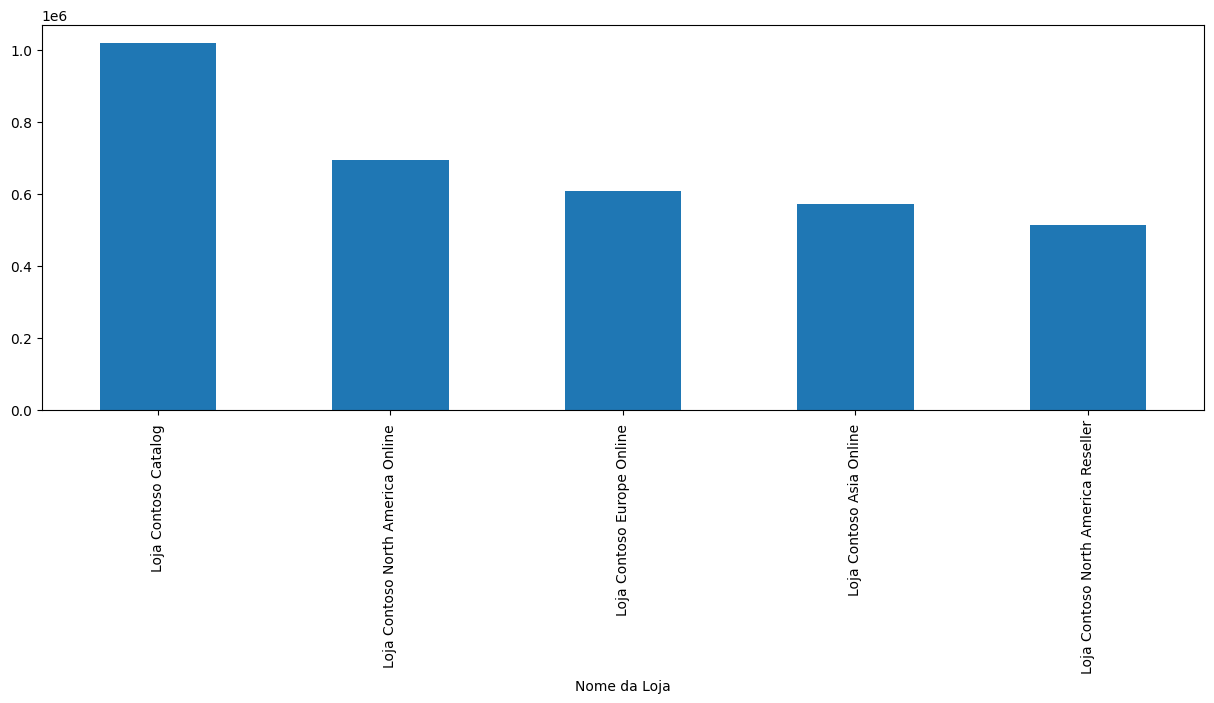

In [31]:
# Qual a loja que mais vendeu?
vendas_lojas = vendas_df[['Nome da Loja', 'Quantidade Vendida','Quantidade Devolvida']].groupby('Nome da Loja').sum()
vendas_lojas['Quantidade Vendas Totais'] = vendas_lojas['Quantidade Vendida'] - vendas_lojas['Quantidade Devolvida']

# Opção 1
vendas_lojas = vendas_lojas.sort_values(by='Quantidade Vendas Totais', ascending=False)

display(vendas_lojas[:5])
vendas_lojas['Quantidade Vendas Totais'][:5].plot(figsize=(15,5), kind='bar')

# Opção 2
maior_quantidade_vendas = vendas_lojas['Quantidade Vendas Totais'].max()
loja_indice = vendas_lojas['Quantidade Vendas Totais'].idxmax()

display(f'A {loja_indice} possui a maior quantidade em vendas, total de {maior_quantidade_vendas} vendas')


In [32]:
# Qual produto que menos vendeu?
display(vendas_lojas[-1:])

# ou usar min() ou idxmin()

,Quantidade Vendida,Quantidade Devolvida,Quantidade Vendas Totais
Nome da Loja,,,
Loja Contoso Venezia,234,6,228
